<a href="https://colab.research.google.com/github/harrisuddin/F20DL/blob/main/p_6_2_ANN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Artificial Neural Network And CNN
Based on TensorFlow Core Tutorials https://www.tensorflow.org/tutorials/keras/classification

In [208]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [209]:
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import numpy as np
from tensorflow import keras
import requests
import io
import pandas as pd
from io import BytesIO

# Load Data Fashion MNIST

In [210]:
X_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/smiley_X.npy"
y_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/smiley_y.npy"

#bnb_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/Airbnb_Open_Data.csv"
#bnb_download = requests.get(bnb_url).content

X_download = requests.get(X_url).content
y_download = requests.get(y_url).content
#print(X_download)


X = np.load(BytesIO(X_download)).astype(int)
y = np.load(BytesIO(y_download)).astype(int)

x_train, x_test = X, X
y_train, y_test = y, y

#X = np.load(X_download)
#y = np.load(y_download)

#df = pd.DataFrame(eval, X_download)
x_train.shape = (144, 9, 9)
x_train.shape


(144, 9, 9)

In [211]:
class_names = ['Happy', 'Sad',]

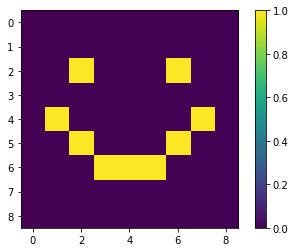

In [212]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [213]:
print(y_train[0])

0


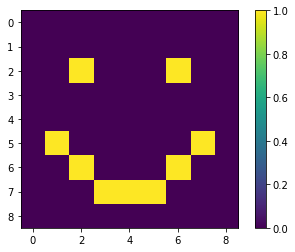

In [214]:
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [215]:
print(x_train[2])

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


In [216]:
print(y_train[2])

0


# Normalizing

In [217]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

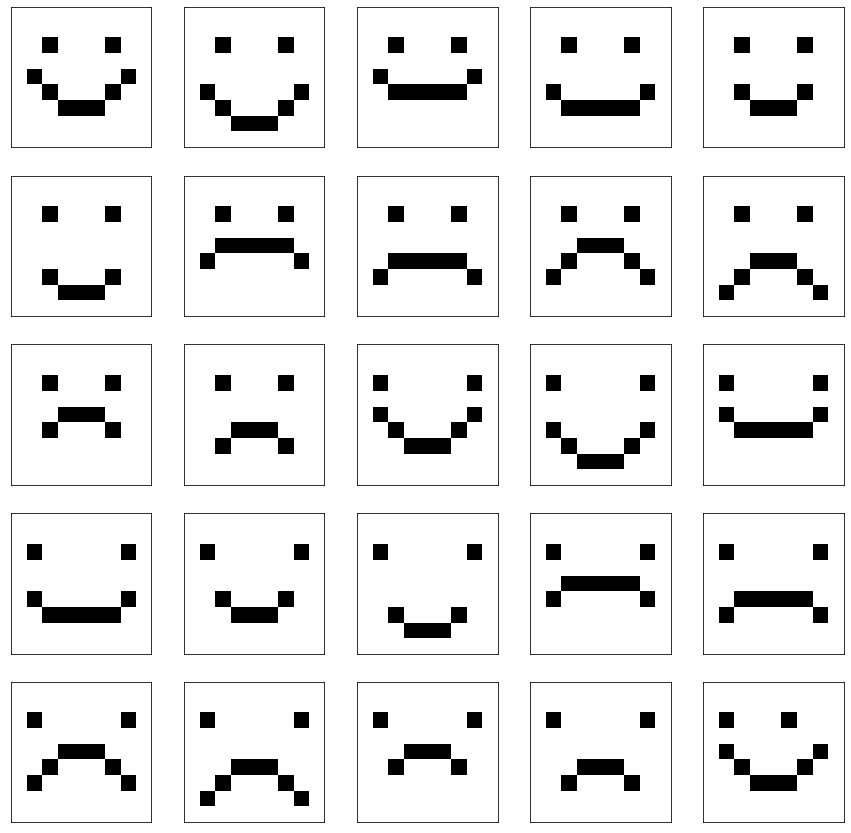

In [218]:
plt.figure(figsize=(15,15))
for i in range(25):
    #i = int(i)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    i = int(i)
    #plt.xlabel(class_names[y_train[i]])
plt.show()

In [219]:
x_train.shape #28*28=784

(144, 9, 9)

# Building an ANN model

In [220]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9, 9)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Relu ```if X>0 return X, else return 0```

softmax turns a set of predicted probability to sets of 0 and 1, so it is easy to find the highest probability 

In [221]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


If the labels are one-hot-encoded categorical cross-entropy and if it is not sparse categorical cross-entropy

# Training the Model 

In [222]:
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 2.2918 - accuracy: 0.3681
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 2.2597 - accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 2.2229 - accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 2.1808 - accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 2.1330 - accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 2.0786 - accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 2.0179 - accuracy: 0.5000
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 1.9512 - accuracy: 0.5000
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 1.8783 - accuracy: 0.5000
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 1.8001 - accuracy: 0.5000


# Evaluate

In [223]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.5


verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar.

# Prediction

In [224]:
classifications = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [225]:
print(classifications[3])


[0.16721632 0.18076694 0.07597975 0.07893297 0.08739968 0.08393368
 0.08249444 0.08989653 0.07925157 0.07412814]


In [226]:
np.argmax(classifications[3])

1

In [227]:
np.max(classifications[3])

0.18076694

In [228]:
class_names[np.argmax(classifications[3])]

'Sad'

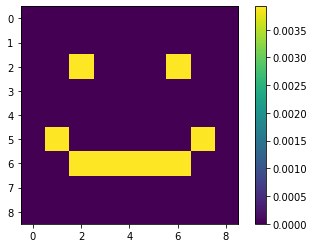

In [229]:
plt.imshow(x_test[3])
plt.colorbar()
plt.grid(False)

In [230]:

def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [231]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


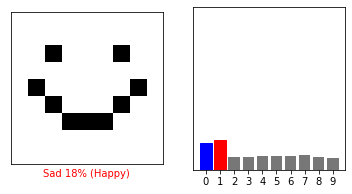

In [232]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

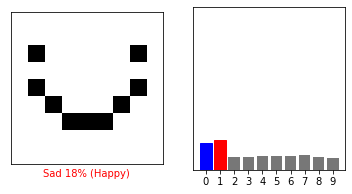

In [233]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

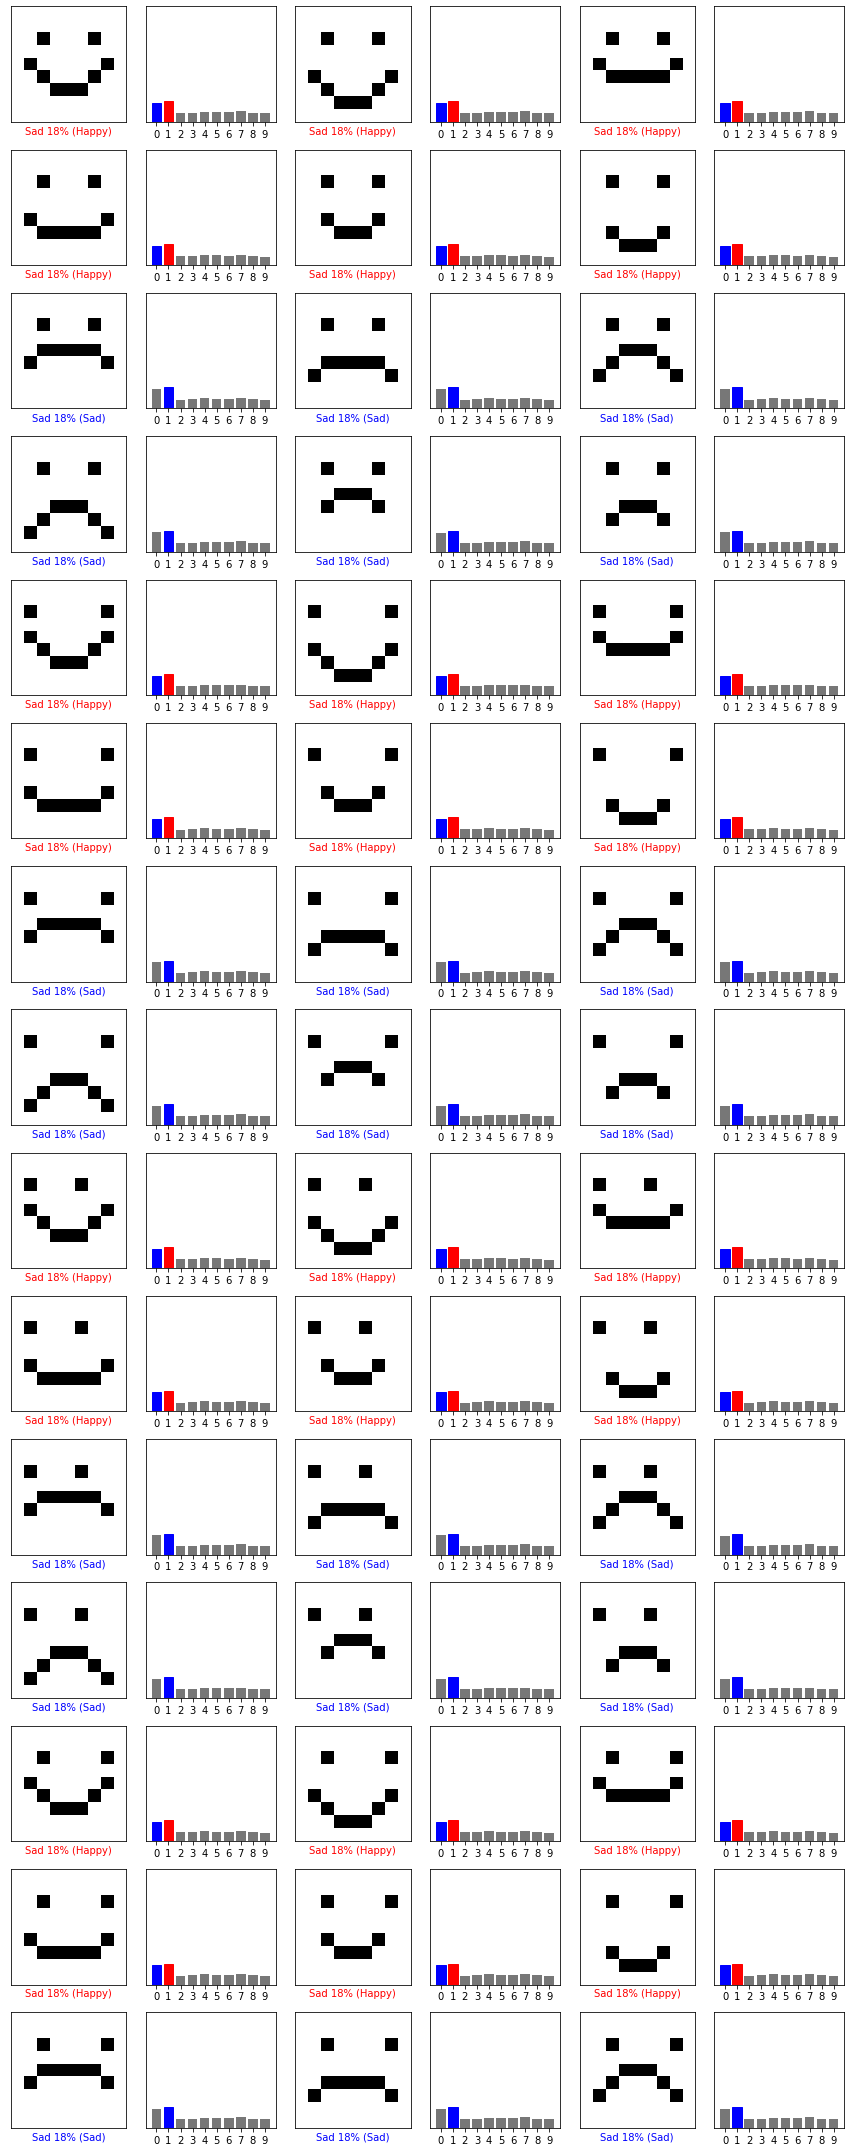

In [234]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test)
plt.tight_layout()
plt.show()

# Building the CNN Model

In [235]:
X_download = requests.get(X_url).content
X = np.load(BytesIO(X_download)).astype(int)
x_train, x_test = X, X
x_train = x_train.reshape(144, 9, 9, 1)
y_train, y_test = y, y
x_train.shape #28*28=784

(144, 9, 9, 1)

In [236]:
for i in range(94):
  x_test = np.delete(x_test, 1, 0)
  y_test = np.delete(y_test, 1, 0)
y_test.shape

(50,)

In [237]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 128)             

If the labels are one-hot-encoded categorical cross-entropy and if it is not sparse categorical cross-entropy

In [238]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
5/5 [==============================] - 0s 4ms/step - loss: 2.1433 - accuracy: 0.3611
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.6439 - accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 1.0696 - accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.6250
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5500 - accuracy: 0.9583


In [239]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [240]:
classifications = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [241]:
print(classifications[3])

[6.7298943e-01 3.2265544e-01 4.0560140e-04 5.2560907e-04 1.8753216e-04
 1.0954372e-03 9.7282161e-04 3.1246079e-04 6.1032746e-04 2.4537480e-04]


In [242]:
np.argmax(classifications[3])

0

In [243]:
np.max(classifications[3])

0.6729894

In [244]:
class_names[np.argmax(classifications[3])]

'Happy'

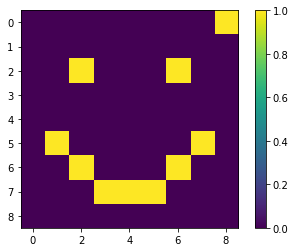

In [245]:
plt.imshow(x_test[3].reshape(9,9))
plt.colorbar()
plt.grid(False)

# Visualise Layers

1/1 [==============================] - 0s 16ms/step


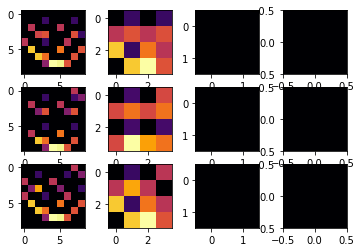

In [246]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

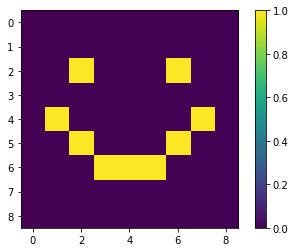

In [247]:
plt.imshow(x_train[FIRST_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

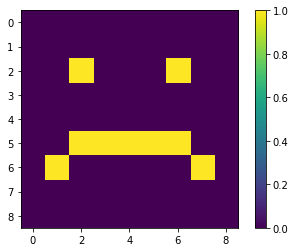

In [248]:
plt.imshow(x_train[SECOND_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

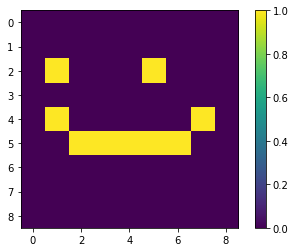

In [249]:
plt.imshow(x_train[THIRD_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)